In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
sns.set_theme()

file = "stored.npz"

# MNIST

In [2]:
run_full = np.array( [0.9956, 0.9943, 0.9957])
max_acc = run_full.mean()
max_acc_std = run_full.std(ddof=1)
file = "stored.npz"
print(max_acc, max_acc_std)

0.9952 0.0007810249675907074


In [349]:
# Initial - Wrong
names = ['BALD', 'Entropy', 'Random']
base_dirs = [
    "/home/c817h/Documents/logs/activelearning/mnist_ba_bald",
    "/home/c817h/Documents/logs/activelearning/mnist_ba_entropy",
    "/home/c817h/Documents/logs/activelearning/mnist_ba_random"
]

In [350]:
# Acquisition Size 20
names = ['BatchBALD','BALD', 'Entropy', 'Random']
base_dirs = [
    "/home/c817h/Documents/logs/activelearning/mnist_ba_batchbald_20acq",
    "/home/c817h/Documents/logs/activelearning/mnist_ba_bald_20acq",
    "/home/c817h/Documents/logs/activelearning/mnist_ba_entropy_20acq",
    "/home/c817h/Documents/logs/activelearning/mnist_ba_random_20acq",
]

In [351]:
# Final with early stop
names = ['BatchBALD','BALD', 'Entropy', 'Random']
base_dirs = [
    "/home/c817h/Documents/logs/activelearning/bb_ba_batchbald_10acq",
    "/home/c817h/Documents/logs/activelearning/bb_ba_bald_10acq",
    "/home/c817h/Documents/logs/activelearning/bb_ba_entropy_10acq",
    "/home/c817h/Documents/logs/activelearning/bb_ba_random_10acq",
]

In [352]:
# Final without early stop
names = [
    'BatchBALD',
    'BALD', 
    'Entropy', 
    'Random'
]
base_dirs = [
    "/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_nostop_100",
    "/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_nostop_100",
    "/home/c817h/Documents/logs/activelearning/mnist_bb__entropy_10acq_nostop_100",
    "/home/c817h/Documents/logs/activelearning/mnist_bb__random_10acq_nostop_100",
]

In [353]:
# Final Runs
names = [
    'BatchBALD',
    'BALD', 
    'Entropy', 
    'Random'
]
base_dirs = [
    "/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_final",
    "/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_final",
    "/home/c817h/Documents/logs/activelearning/mnist_bb__entropy_10acq_final",
    "/home/c817h/Documents/logs/activelearning/mnist_bb__random_10acq_final",
]
print(max_acc, max_acc_std)

0.9952 0.0007810249675907074


In [354]:
df = []
for name, base_dir in zip(names, base_dirs):
    print(name)
    print(base_dir)
    out_dicts = []
    folders=os.listdir(base_dir)
    for folder in folders:
        path = os.path.join(base_dir, folder, file)
        if os.path.isfile(path):
            print(path)
            out_dicts.append(dict(np.load(path)))
    
    dataframe = []
    for i, out_dict in enumerate(out_dicts):
        for key in out_dict:
            pop_keys=[]
            if len(out_dict[key].shape) > 1:
                pop_keys.append(key)
        for key in pop_keys:
            out_dict.pop(key)
        df_temp = pd.DataFrame(out_dict)
        df_temp['run'] = i
        dataframe.append(df_temp)

    dataframe = pd.concat(dataframe)
    dataframe['Sampling'] = name
    df.append(dataframe)
df = pd.concat(df)
df.reset_index(inplace=True)

BatchBALD
/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_final
/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_final/2021-11-04_19-09-23-433798/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_final/2021-11-05_02-11-15-629488/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_final/2021-11-05_09-15-54-605146/stored.npz
BALD
/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_final
/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_final/2021-11-05_00-47-46-940038/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_final/2021-11-05_07-52-14-540621/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_final/2021-11-04_17-48-47-317809/stored.npz
Entropy
/home/c817h/Documents/logs/activelearning/mnist_bb__entropy_10acq_final
/home/c817h/Documents/logs/activelearning/mnist_bb__entropy_10acq_final/2021-11-04_16-24-37-173177/stored

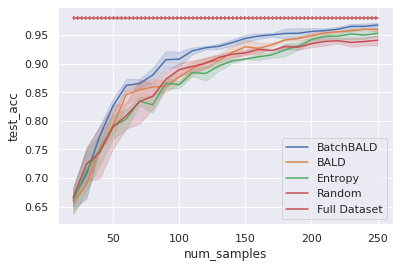

In [356]:
out_samples = df['num_samples'].unique()
out_samples.sort()

fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=df, y='test_acc',x='num_samples', hue='Sampling', ci="sd" )
# test_mean = np.array([max_acc]*len(out_samples))
# test_min = test_mean - max_acc_std
# test_max = test_mean + max_acc_std
ax.plot(out_samples, test_mean, label='Full Dataset', color='r')
ax.plot(out_samples, test_min, color='r', linestyle='dotted')
ax.plot(out_samples, test_max, color='r', linestyle='dotted')
                     
                     
plt.legend()
# ax.set_ylim(0.8, 1.)
# ax.set_ylim(0.92, 0.98)
# fig.set_size_inches(8, 6)
plt.show()

In [325]:
# short
# file = "/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_nostop_100/2021-11-04_09-39-18-904725/stored.npz"
# file = "/home/c817h/Documents/logs/activelearning/mnist_bb__entropy_10acq_nostop_100/2021-11-02_17-06-41-108725/stored.npz"
# file = "/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_nostop_100/2021-11-02_20-10-24-013432/stored.npz"

# long
file = "/home/c817h/Documents/logs/activelearning/mnist_bb__batchbald_10acq_final/2021-11-04_19-09-23-433798/stored.npz"
# file = "/home/c817h/Documents/logs/activelearning/mnist_bb__entropy_10acq_final/2021-11-04_16-24-37-173177/stored.npz"
# file = "/home/c817h/Documents/logs/activelearning/mnist_bb__bald_10acq_final/2021-11-05_00-47-46-940038/stored.npz"
# file = "/home/c817h/Documents/logs/activelearning/mnist_bb__random_10acq_final/2021-11-05_05-09-57-529143/stored.npz"

data = np.load(file)
labels = '''0 1 2 3 4 5 6 7 8 9'''.split()
num_classes= len(labels)
added_l =data['added_labels']
num_it = added_l.shape[0]
added_l_p = np.zeros([added_l.shape[0], num_classes])
for c in range(num_classes):
    added_l_p[:, c] = (added_l==c).mean(axis=1)
    
added_l_p = np.concatenate([np.ones([1, num_classes])/num_classes, added_l_p], axis=0)[:num_it]
yticks = data['num_samples']
len(yticks)

24

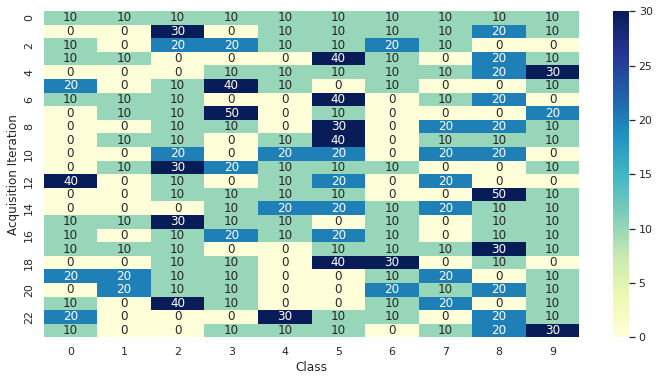

In [326]:
show = added_l_p *100
fig, ax = plt.subplots()
sns.heatmap(show, ax=ax,vmin=0, vmax=30, cmap="YlGnBu", annot=True)
ax.set_xticklabels(labels)
# ax.set_yticklabels(yticks)
ax.set_ylabel('Acquisition Iteration')
ax.set_xlabel('Class')
fig.set_size_inches(12, 6)
# fig.set_size_inches(16, 9)
plt.show()

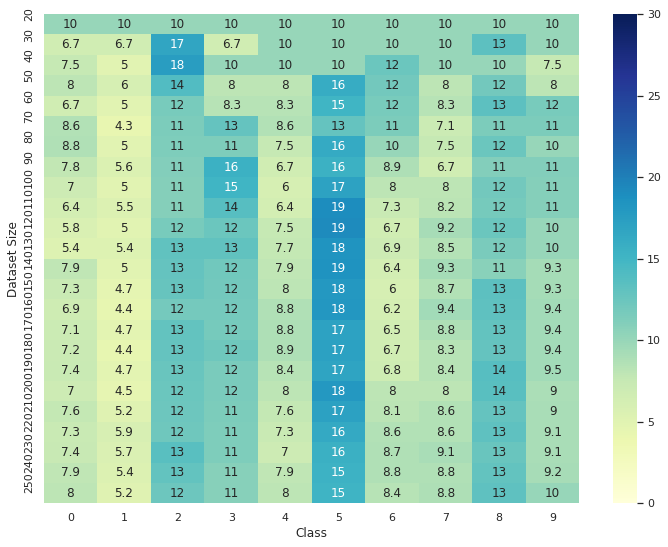

In [327]:
added_l_f = added_l_p* np.array([yticks[0], *[yticks[i] -yticks[i-1] for i in range(1, len(yticks))]])[:, None]
added_l_f = np.cumsum(added_l_f, axis=0)
added_l_f /= added_l_f.sum(axis=1,keepdims=True)

show = added_l_f *100
fig, ax = plt.subplots()
sns.heatmap(show, ax=ax,vmin=0, vmax=30, cmap="YlGnBu", annot=True)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(len(yticks)))
ax.set_yticklabels(yticks)

ax.set_ylabel('Dataset Size')
ax.set_xlabel('Class')
fig.set_size_inches(12, 9)
# fig.set_size_inches(16, 9)
plt.show()

## CIFAR10

In [9]:
# run_full = np.array( [0.9807, 0.9802, 0.9812, 0.9760, 0.9804 ]) # TODO: compute new Values!
# max_acc = run_full.mean()
# max_acc_std = run_full.std(ddof=1)
names = [
#         'BatchBALD',
         'BALD', 
         'Entropy', 
         'Random']
base_dirs = [
#     "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_batchbald_1000acq",
    "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_bald_1000acq",
    "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_entropy_1000acq",
    "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_random_1000acq",
]
# print(max_acc, max_acc_std)

In [10]:
run_full = np.array( [0.9807, 0.9802, 0.9812, 0.9760, 0.9804 ]) # TODO: compute new Values!
max_acc = run_full.mean()
max_acc_std = run_full.std(ddof=1)
names = [
#         'BatchBALD',
#          'BALD', 
         'Entropy (Det)', 
            'Entropy, M=10000 (Det)',
         'Random (Det)',
    "Bald (Bay)",
        "Entropy (Bay)",
    'Entropy, M=10k (Bay)',
         'Random (Bay)',
    'Entropy (Det) [lr=0.1]',
    'Entropy, M=10k (Det) [lr=0.1]',
    'Random (Det) [lr=0.1]',
]
base_dirs = [
#     "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_batchbald_1000acq",
#     "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_bald_1000acq",
    "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_1000acq_goodfit",
    "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_random_1000acq_goodfit",
    "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_random_1000acq_goodfit",
    "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_bald_1000acq_goodfit/",
    "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_entropy_1000acq_goodfit",
    "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_entropy_random_1000acq_goodfit",
    "/home/c817h/Documents/logs/activelearning/cifar10_ba_resnet_random_1000acq_goodfit",
    "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_1000acq",
    "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_random_1000acq",
    "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_random_1000acq",
    
]
print(max_acc, max_acc_std)

0.9797 0.00210237960416287


In [11]:
names = [
         'Entropy (Det)', 
#             'Entropy, M=10000 (Det)',
        'k-Center Greedy (Det)',
         'Random (Det)',
#     "Bald (Bay)",
#         "Entropy (Bay)",
#     'Entropy, M=10k (Bay)',
#          'Random (Bay)',
#     'Entropy (Det) - low data',
#     'Entropy, M=10k (Det) - low data',
#     'Random (Det) - low data',
]
base_dir = "/home/c817h/Documents/logs/activelearning/"

folders = [
    "cifar10_det_resnet_entropy_1000acq_goodfit",
#     "cifar10_det_resnet_entropy_random_1000acq_goodfit",
#     "cifar10_det_resnet_kcentergreedy_1000acq_train-trafo-core",
    "cifar10_det_resnet_kcentergreedy_1000acq_correct_trafo",
    "cifar10_det_resnet_random_1000acq_goodfit",
]
base_dirs = [base_dir+folder for folder in folders]

In [12]:
df = []
for name, base_dir in zip(names, base_dirs):
    print(name)
    print(base_dir)
    out_dicts = []
    folders=os.listdir(base_dir)
    for folder in folders:
        path = os.path.join(base_dir, folder, file)
        if os.path.isfile(path):
            print(path)
            out_dicts.append(dict(np.load(path)))
    
    dataframe = []
    for i, out_dict in enumerate(out_dicts):
        for key in out_dict:
            pop_keys=[]
            if len(out_dict[key].shape) > 1:
                pop_keys.append(key)
        for key in pop_keys:
            out_dict.pop(key)
        df_temp = pd.DataFrame(out_dict)
        df_temp['run'] = i
        dataframe.append(df_temp)

    dataframe = pd.concat(dataframe)
    dataframe['Sampling'] = name
    df.append(dataframe)
df = pd.concat(df)
df.reset_index(inplace=True)
# df[df['num_samples']==1000]

Entropy (Det)
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_1000acq_goodfit
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_1000acq_goodfit/2021-11-06_21-41-51-113651/stored.npz
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_1000acq_goodfit/2021-11-07_14-24-33-465016/stored.npz
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_1000acq_goodfit/2021-11-07_06-05-19-727886/stored.npz
k-Center Greedy (Det)
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_kcentergreedy_1000acq_correct_trafo
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_kcentergreedy_1000acq_correct_trafo/2021-11-11_14-11-52-225985/stored.npz
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_kcentergreedy_1000acq_correct_trafo/2021-11-11_16-51-57-048059/stored.npz
/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_kcentergreedy_1000acq_correct_trafo/2021-11-11_19-34-53-031873/stored.npz
Random (

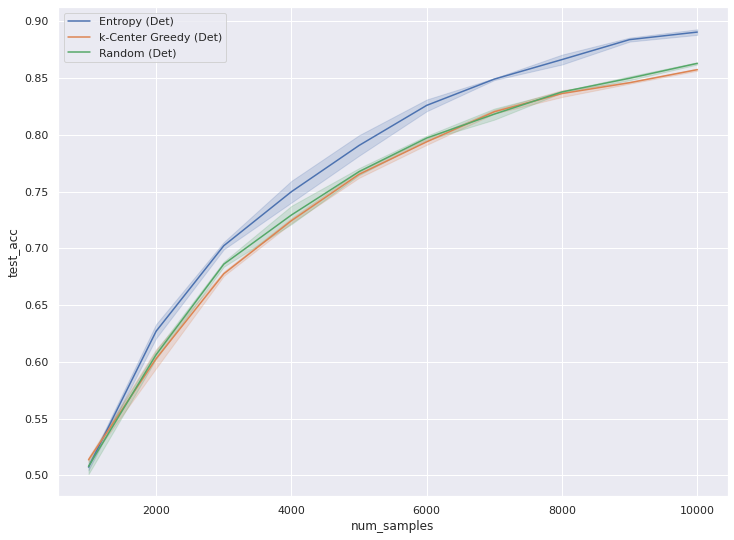

In [13]:
out_samples = df['num_samples'].unique()
out_samples.sort()

fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=df, y='test_acc',x='num_samples', hue='Sampling', ci="sd" )

# test_mean = np.array([max_acc]*len(out_samples))
# test_min = test_mean - max_acc_std
# test_max = test_mean + max_acc_std
# ax.plot(out_samples, test_mean, label='Full Dataset', color='r')
# ax.plot(out_samples, test_min, color='r', linestyle='dotted')
# ax.plot(out_samples, test_max, color='r', linestyle='dotted')
                     
                     
plt.legend()
# ax.set_ylim(0.8, 0.9)
# fig.set_size_inches(8, 6)
fig.set_size_inches(12,9)
plt.show()

In [14]:
df2 = df

In [15]:
names = [
#          'Entropy (Det)', 
#             'Entropy, M=10000 (Det)',
#         'k-Center Greedy, M=10000 (Det)',
    'Entropy - SimCLR',
    'k-center Greedy - SimCLR',
    'Random - SimCLR',
    'Entropy - SimCLR [frozen]',
    'k-center Greedy - SimCLR [frozen]',
    'Random - SimCLR [frozen]',
#          'Random (Det)',
#     "Bald (Bay)",
#         "Entropy (Bay)",
#     'Entropy, M=10k (Bay)',
#          'Random (Bay)',
#     'Entropy (Det) - low data',
#     'Entropy, M=10k (Det) - low data',
#     'Random (Det) - low data',
]
base_dir = "/home/c817h/Documents/logs_cluster/activelearning/"

folders = [
#     "cifar10_det_resnet_entropy_random_1000acq_goodfit",
#     "cifar10_det_resnet_kcentergreedy_random_1000acq_goodfit",
    "cifar10_det_resnet_entropy_1000acq_ssl",
    "cifar10_det_resnet_kcentergreedy_1000acq_ssl",
    "cifar10_det_resnet_random_1000acq_ssl",
    "cifar10_det_resnet_entropy_1000acq_ssl-freeze",
    "cifar10_det_resnet_kcentergreedy_1000acq_ssl-freeze",
    "cifar10_det_resnet_random_1000acq_ssl-freeze",
#     "cifar10_det_resnet_kcentergreedy_1000acq_train-trafo-core",
# #     "cifar10_det_resnet_kcentergreedy_1000acq_correct_trafo",
#     "cifar10_det_resnet_random_1000acq_goodfit",
]
base_dirs = [base_dir+folder for folder in folders]

In [35]:
names = [
#     'BALD - SimCLR (Bay)',
#     'Entropy - SimCLR (Bay)',
#     'k-center Greedy - SimCLR (Bay)',
#     'Random - SimCLR (Bay)',
    'Entropy - SimCLR ',
    'k-center Greedy - SimCLR',
    'Random - SimCLR',
    'Entropy - SimCLR (Big Head)',
    'Random - SimCLR (Big Head)',
]
base_dir = "/home/c817h/Documents/logs_cluster/activelearning/"

folders = [
#     "cifar10_acq-standard_bay-resnet_bald_ssl",
#     "cifar10_acq-standard_bay-resnet_entropy_ssl",
#     "cifar10_acq-standard_bay-resnet_kcentergreedy_ssl",
#     "cifar10_acq-standard_bay-resnet_random_ssl",
    "cifar10_acq-standard_det-resnet_entropy_ssl",
    "cifar10_acq-standard_det-resnet_kcentergreedy_ssl",
    "cifar10_acq-standard_det-resnet_random_ssl",
    "cifar10_acq-standard_det-resnet_fixmatch_entropy_fixmatch_ssl_finetune_big-head",
    "cifar10_acq-standard_det-resnet_fixmatch_random_fixmatch_ssl_finetune_big-head"
    
]
base_dirs = [base_dir+folder for folder in folders]

In [36]:
df = []
for name, base_dir in zip(names, base_dirs):
    print(name)
    print(base_dir)
    out_dicts = []
    folders=os.listdir(base_dir)
    for folder in folders:
        path = os.path.join(base_dir, folder, file)
        if os.path.isfile(path):
            print(path)
            out_dicts.append(dict(np.load(path)))
    
    dataframe = []
    for i, out_dict in enumerate(out_dicts):
        for key in out_dict:
            pop_keys=[]
            if len(out_dict[key].shape) > 1:
                pop_keys.append(key)
        for key in pop_keys:
            out_dict.pop(key)
        df_temp = pd.DataFrame(out_dict)
        df_temp['run'] = i
        dataframe.append(df_temp)

    dataframe = pd.concat(dataframe)
    dataframe['Sampling'] = name
    df.append(dataframe)
df = pd.concat(df)
df.reset_index(inplace=True)
# df[df['num_samples']==1000]

Entropy - SimCLR 
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_entropy_ssl
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_entropy_ssl/2021-12-09_00-25-11-599225/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_entropy_ssl/2021-12-09_00-25-11-088874/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_entropy_ssl/2021-12-09_00-25-11-387899/stored.npz
k-center Greedy - SimCLR
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_kcentergreedy_ssl
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_kcentergreedy_ssl/2021-12-09_00-25-09-602262/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_kcentergreedy_ssl/2021-12-09_00-25-11-092745/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar10_acq-standard_det-resnet_kcentergr

In [37]:
df = pd.concat([df2, df])
df.reset_index(inplace=True)

In [38]:
out_dict

{'val_acc': array([0.881 , 0.8932, 0.899 , 0.9034, 0.91  , 0.9096, 0.9126, 0.9206,
        0.9246, 0.9256]),
 'test_acc': array([0.867 , 0.8816, 0.8907, 0.8959, 0.9014, 0.9049, 0.9074, 0.914 ,
        0.9147, 0.9194]),
 'num_samples': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000])}

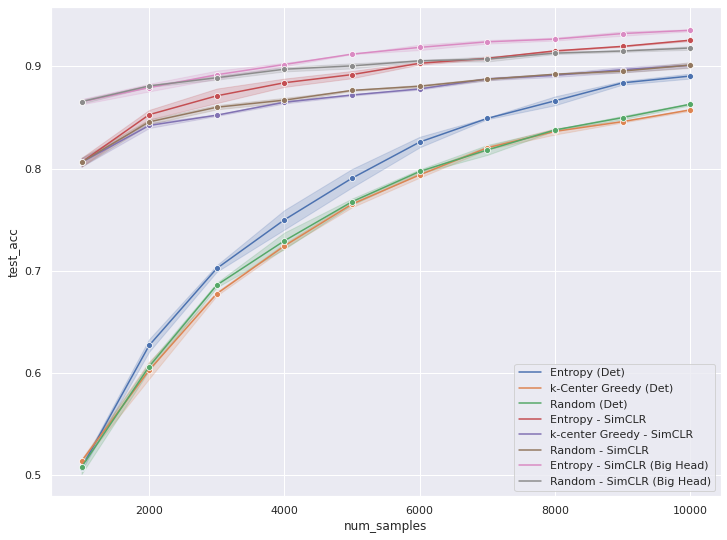

In [42]:
out_samples = df['num_samples'].unique()
out_samples.sort()

fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=df, y='test_acc',x='num_samples', hue='Sampling', 
             ci="sd", 
             markers=True, marker='o',dashes=False )

# test_mean = np.array([max_acc]*len(out_samples))
# test_min = test_mean - max_acc_std
# test_max = test_mean + max_acc_std
# ax.plot(out_samples, test_mean, label='Full Dataset', color='r')
# ax.plot(out_samples, test_min, color='r', linestyle='dotted')
# ax.plot(out_samples, test_max, color='r', linestyle='dotted')
                     
                     
plt.legend()
# ax.set_ylim(0.8, 0.95)
# fig.set_size_inches(8, 6)
fig.set_size_inches(12,9)
plt.show()

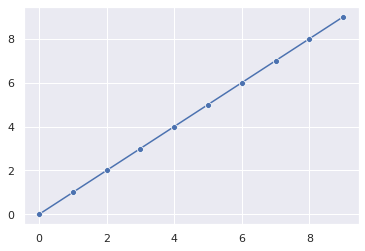

In [75]:
x = np.arange(10)
sns.lineplot(x=x, y=x, markers=True, marker='o')
plt.show()

### Differences
- Early Stopping
- Resampling of Images
- Validation Set???????? (How do they select final Model??????????)

In [299]:
# file = "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_1000acq/2021-11-02_12-42-46-898249/stored.npz"
# file= "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_entropy_random_1000acq/2021-11-03_12-43-55-084628/stored.npz"
file = "/home/c817h/Documents/logs/activelearning/cifar10_det_resnet_random_1000acq/2021-11-02_09-52-15-945242/stored.npz"
data = np.load(file)
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

In [300]:
num_classes=10
added_l =data['added_labels']
num_it = added_l.shape[0]
added_l_p = np.zeros([added_l.shape[0], num_classes])
for c in range(num_classes):
    added_l_p[:, c] = (added_l==c).mean(axis=1)
    
added_l_p = np.concatenate([np.ones([1, num_classes])/num_classes, added_l_p], axis=0)[:num_it]
yticks = data['num_samples']
    

### HeatMap of Classes for each acquisition step

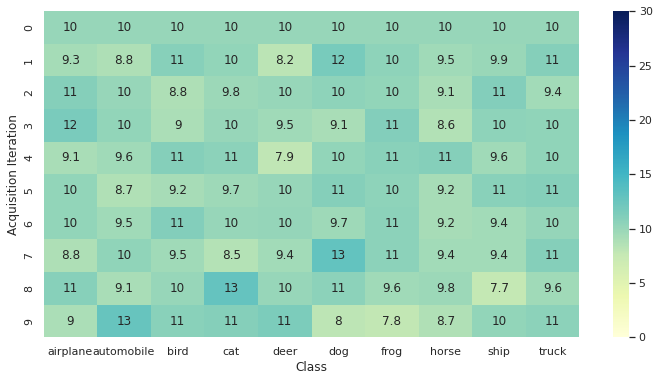

In [301]:
show = added_l_p *100
fig, ax = plt.subplots()
sns.heatmap(show, ax=ax,vmin=0, vmax=30, cmap="YlGnBu", annot=True)
ax.set_xticklabels(labels)
# ax.set_yticklabels(yticks)
ax.set_ylabel('Acquisition Iteration')
ax.set_xlabel('Class')
fig.set_size_inches(12, 6)
# fig.set_size_inches(16, 9)
plt.show()

In [302]:
added_l_f = added_l_p* np.array([yticks[0], *[yticks[i] -yticks[i-1] for i in range(1, len(yticks))]])[:, None]
added_l_f = np.cumsum(added_l_f, axis=0)
added_l_f /= added_l_f.sum(axis=1,keepdims=True)

### HeatMap of Classes for whole dataset of size

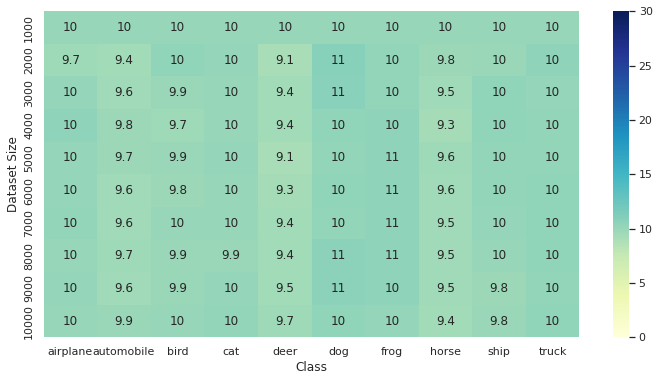

In [303]:
show = added_l_f *100
fig, ax = plt.subplots()
sns.heatmap(show, ax=ax,vmin=0, vmax=30, cmap="YlGnBu", annot=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(yticks)

ax.set_ylabel('Dataset Size')
ax.set_xlabel('Class')
fig.set_size_inches(12, 6)
# fig.set_size_inches(16, 9)
plt.show()

## CIFAR100

In [6]:
file = "stored.npz"

In [13]:
names = [
         'Entropy (Det) [lr=0.01]', 
            'Entropy, M=10000 (Det) [lr=0.01]',
         'Random (Det) [lr=0.01]',
#     "Bald (Bay)",
#         "Entropy (Bay)",
#     'Entropy, M=10k (Bay)',
#          'Random (Bay)',
    'Entropy (Det) [lr=0.1]',
    'Entropy, M=10k (Det) [lr=0.1]',
    'Random (Det) [lr=0.1]',
]

folders = [ "cifar100_det_resnet_entropy_1000acq_lr0.01",
"cifar100_det_resnet_entropy_random_1000acq_lr0.01",
"cifar100_det_resnet_random_1000acq_lr0.01",
"cifar100_det_resnet_entropy_1000acq_lr0.1",
"cifar100_det_resnet_entropy_random_1000acq_lr0.1",
"cifar100_det_resnet_random_1000acq_lr0.1",]
basedir="/home/c817h/Documents/logs_cluster/activelearning/"
base_dirs = [basedir+folder for folder in folders ]

In [14]:
df = []
for name, base_dir in zip(names, base_dirs):
    print(name)
    print(base_dir)
    out_dicts = []
    folders=os.listdir(base_dir)
    for folder in folders:
        path = os.path.join(base_dir, folder, file)
        if os.path.isfile(path):
            print(path)
            out_dicts.append(dict(np.load(path)))
    
    dataframe = []
    for i, out_dict in enumerate(out_dicts):
        for key in out_dict:
            pop_keys=[]
            if len(out_dict[key].shape) > 1:
                pop_keys.append(key)
        for key in pop_keys:
            out_dict.pop(key)
        df_temp = pd.DataFrame(out_dict)
        df_temp['run'] = i
        dataframe.append(df_temp)

    dataframe = pd.concat(dataframe)
    dataframe['Sampling'] = name
    df.append(dataframe)
df = pd.concat(df)
df.reset_index(inplace=True)

Entropy (Det) [lr=0.01]
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_1000acq_lr0.01
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_1000acq_lr0.01/2021-11-08_23-11-03-482024/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_1000acq_lr0.01/2021-11-08_23-11-03-128613/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_1000acq_lr0.01/2021-11-08_23-11-03-141798/stored.npz
Entropy, M=10000 (Det) [lr=0.01]
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_random_1000acq_lr0.01
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_random_1000acq_lr0.01/2021-11-08_18-30-33-701312/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_random_1000acq_lr0.01/2021-11-08_23-11-03-128338/stored.npz
/home/c817h/Documents/logs_cluster/activelearning/cifar100_det_resnet_entropy_ran

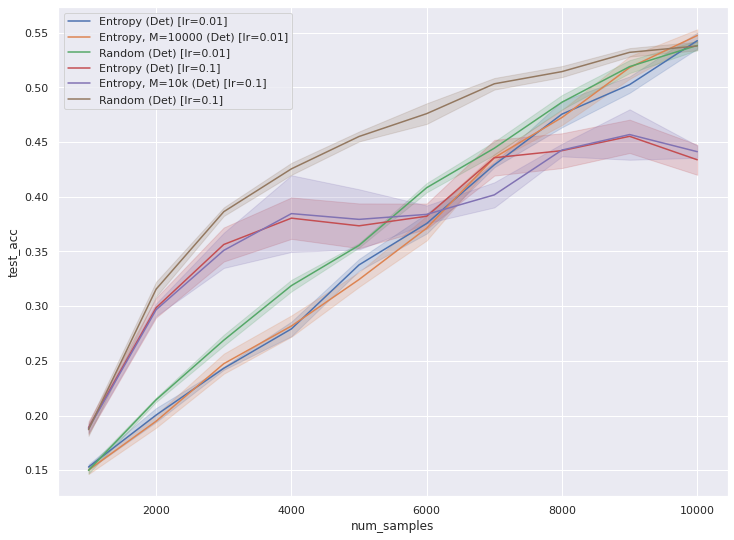

In [15]:
out_samples = df['num_samples'].unique()
out_samples.sort()

fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=df, y='test_acc',x='num_samples', hue='Sampling', ci="sd" )

# test_mean = np.array([max_acc]*len(out_samples))
# test_min = test_mean - max_acc_std
# test_max = test_mean + max_acc_std
# ax.plot(out_samples, test_mean, label='Full Dataset', color='r')
# ax.plot(out_samples, test_min, color='r', linestyle='dotted')
# ax.plot(out_samples, test_max, color='r', linestyle='dotted')
                     
                     
plt.legend()
# ax.set_ylim(0.8, 0.9)
# fig.set_size_inches(8, 6)
fig.set_size_inches(12,9)
plt.show()

In [44]:
base = "/home/c817h/Documents/logs_cluster/activelearning/"
# LR = 0.1
file= base+"cifar100_det_resnet_entropy_1000acq_lr0.1/2021-11-08_23-11-04-273270/stored.npz"
file= base+"cifar100_det_resnet_entropy_random_1000acq_lr0.1/2021-11-08_23-11-03-139914/stored.npz"
# file= base+"cifar100_det_resnet_random_1000acq_lr0.1/2021-11-08_23-11-04-281811/stored.npz"

# LR = 0.01
file= base+"cifar100_det_resnet_entropy_1000acq_lr0.01/2021-11-08_23-11-03-482024/stored.npz"
# file= base+"cifar100_det_resnet_entropy_random_1000acq_lr0.01/2021-11-08_18-30-33-701312/stored.npz"
# file= base+"cifar100_det_resnet_random_1000acq_lr0.01/2021-11-08_23-11-03-130617/stored.npz"

data = np.load(file)
# labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
labels = np.arange(100)
labels = labels.tolist()

In [45]:
num_classes=100
added_l =data['added_labels']
num_it = added_l.shape[0]
added_l_p = np.zeros([added_l.shape[0], num_classes])
for c in range(num_classes):
    added_l_p[:, c] = (added_l==c).mean(axis=1)
    
added_l_p = np.concatenate([np.ones([1, num_classes])/num_classes, added_l_p], axis=0)[:num_it]
yticks = data['num_samples']

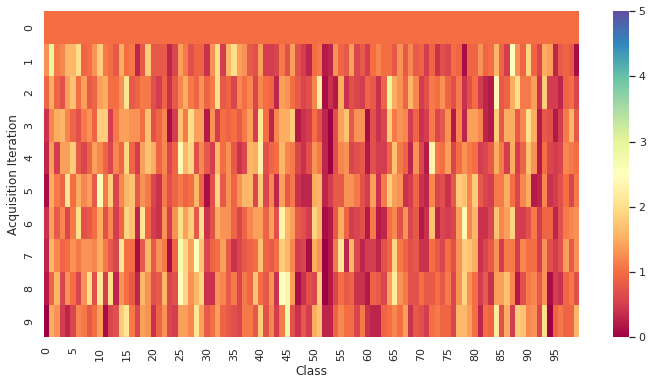

In [46]:
import matplotlib.cm as cm
cmap = cm.get_cmap("Spectral")

show = added_l_p *100
fig, ax = plt.subplots()
sns.heatmap(show, ax=ax,vmin=0, vmax=5, cmap=cmap, annot=False)
# ax.set_xticklabels(labels)
# ax.set_yticklabels(yticks)
ax.set_ylabel('Acquisition Iteration')
ax.set_xlabel('Class')
fig.set_size_inches(12, 6)
# fig.set_size_inches(16, 9)
plt.show()

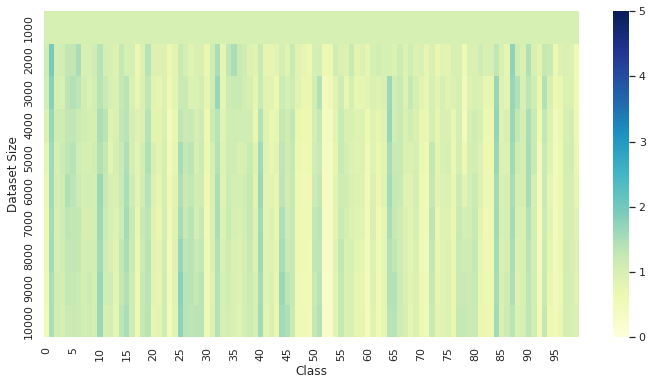

In [47]:
added_l_f = added_l_p* np.array([yticks[0], *[yticks[i] -yticks[i-1] for i in range(1, len(yticks))]])[:, None]
added_l_f = np.cumsum(added_l_f, axis=0)
added_l_f /= added_l_f.sum(axis=1,keepdims=True)
show = added_l_f *100
fig, ax = plt.subplots()
sns.heatmap(show, ax=ax,vmin=0, vmax=5, cmap="YlGnBu", annot=False)
# ax.set_xticklabels(labels)
ax.set_yticklabels(yticks)

ax.set_ylabel('Dataset Size')
ax.set_xlabel('Class')
fig.set_size_inches(12, 6)
# fig.set_size_inches(16, 9)
plt.show()